## Detailed Analysis and Implementation of a CNN on MNIST Dataset

##### Team Members

### Rahul Bhandari (Student ID: 101145564) 
### Abhaya Rawal ( Student ID: 101145746)
### Praveen Raghubanshi (Student ID: 101141342) 



#  Screenshot of GitHub Following Applied AI 

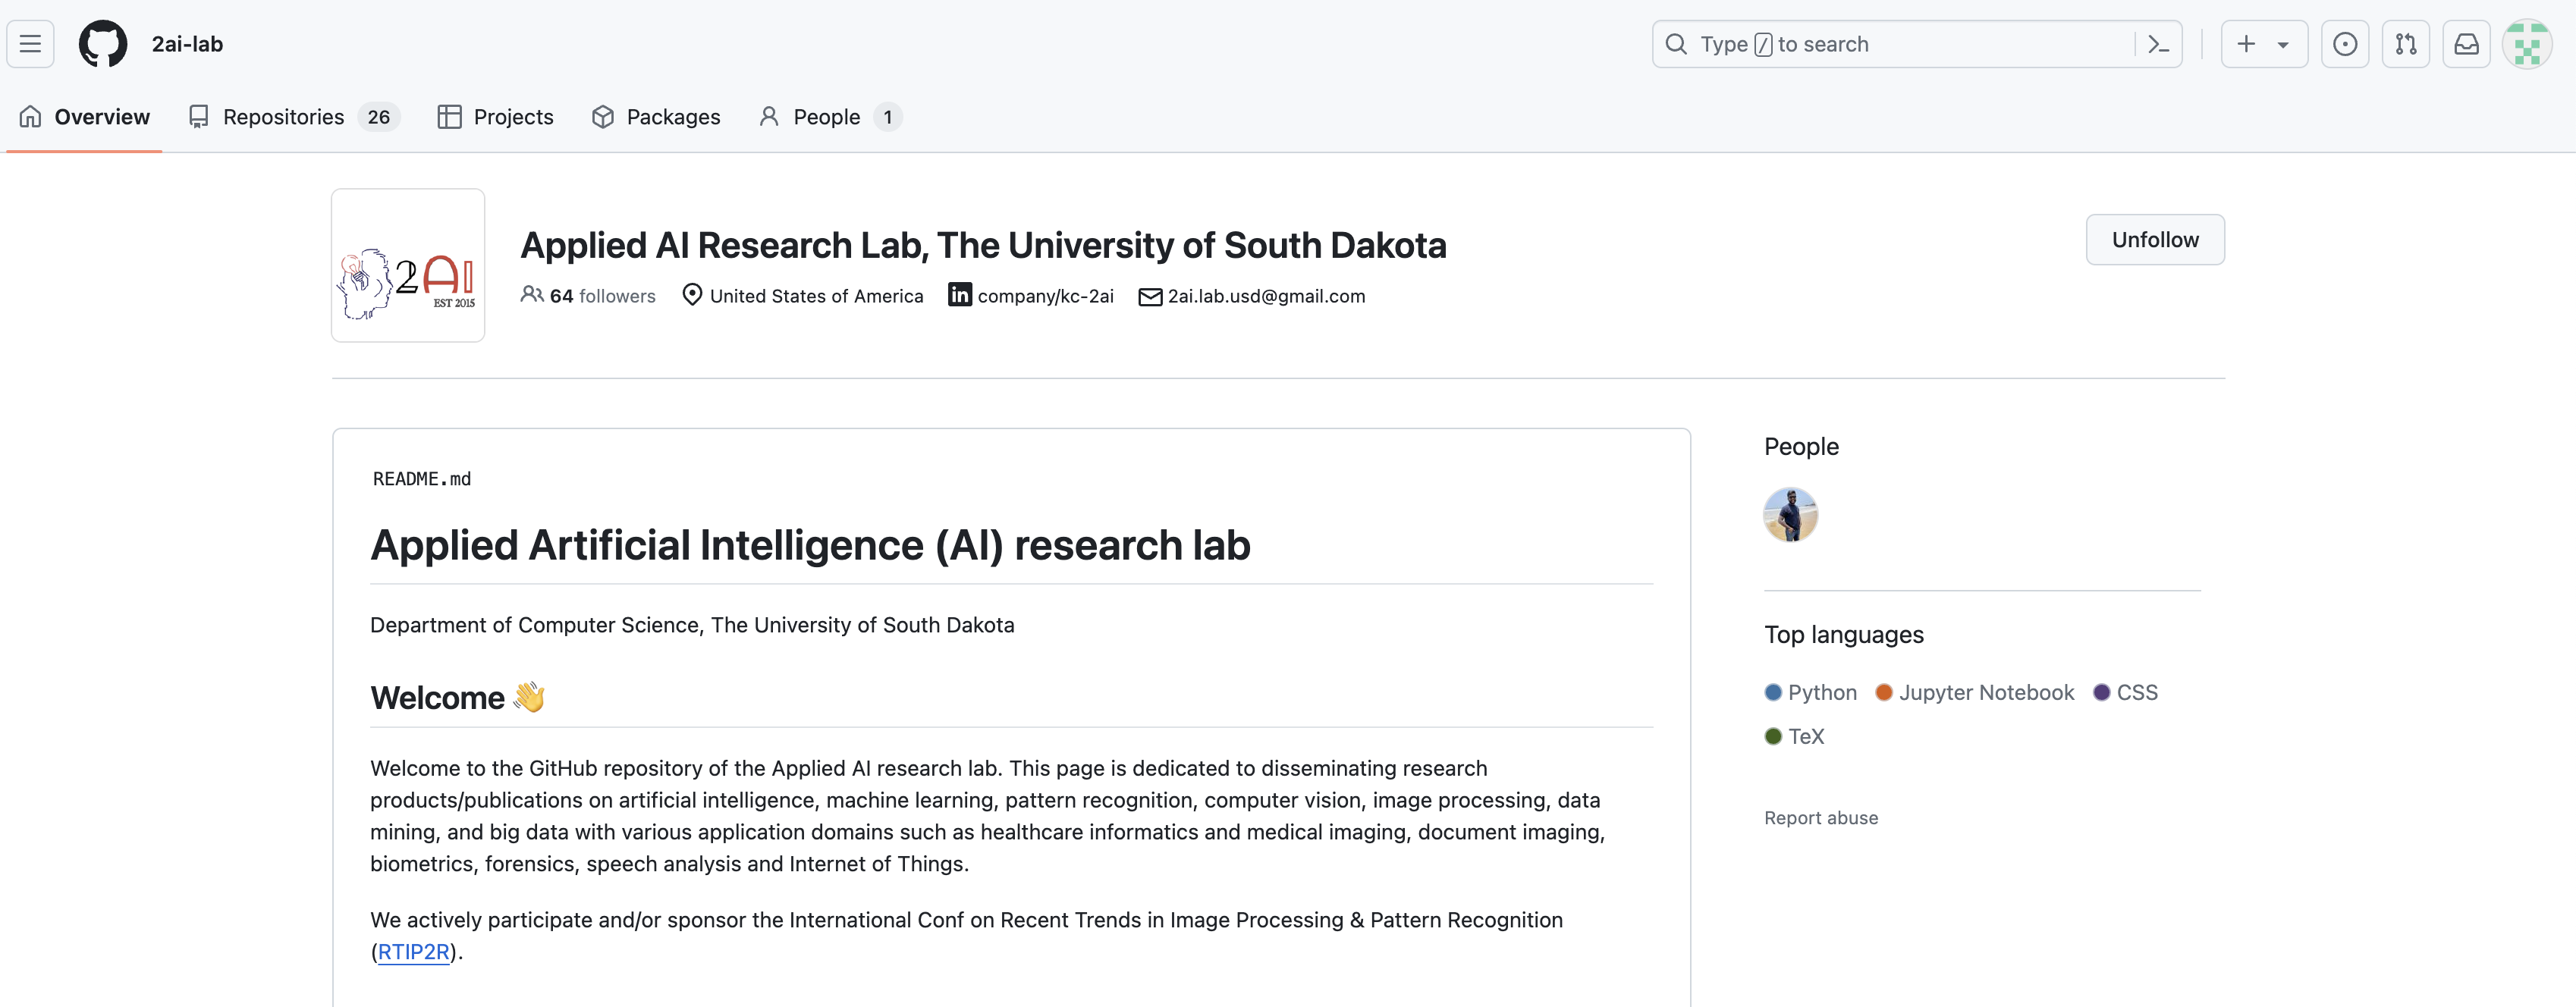

# Data Loading and Initial Inspection
#### This section of the code handles the initial steps necessary to load and inspect the MNIST dataset specifically designed for optical recognition of handwritten digits. Here’s a breakdown of what each line accomplishes:

##### Importing the Library: The fetch_ucirepo function from the ucimlrepo library is imported. This function is used to fetch datasets from the UCI repository directly.
##### Fetching the Dataset: The dataset with ID 80, which corresponds to the optical recognition of handwritten digits, is loaded from the UCI repository. This dataset includes images of handwritten digits along with their corresponding labels.
##### Data Structure: The fetched data is stored in two parts:
##### features: This contains the image data (handwritten digits), typically stored as pandas dataframes where each row represents an image and each column represents a pixel in the image.
##### targets: This contains the labels for the images, where each label denotes the digit that the image represents.
##### Printing Metadata and Variables: The metadata associated with the dataset is printed, providing details such as the number of samples, feature names, and other relevant information. Additionally, the structure and type of data variables are displayed to understand the dataset's layout better.

In [1]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
handwritten_digits = fetch_ucirepo(id=80)

# Data (as pandas dataframes)
features = handwritten_digits.data.features
targets = handwritten_digits.data.targets

# Variable information
print(handwritten_digits.metadata)
print(handwritten_digits.variables)

# Fetch the MNIST handwritten digits dataset from UCI repository and load it into variables for further processing.

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

# Data Preprocessing and Splitting

##### This code segment reshapes the digit images into a consistent format and splits the dataset into training and testing subsets to ensure robust model evaluation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_index_sample_each_class(y_train):
    unique_classes = np.unique(y_train)
    sample_indices = []
    for cls in unique_classes:
        class_indices = np.where(y_train == cls)[0]
        sample_index = np.random.choice(class_indices)
        sample_indices.append(sample_index)
    return sample_indices

from sklearn.model_selection import train_test_split
X = features.to_numpy().reshape(-1, 8, 8) 
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    targets,
                                                    test_size=0.25,  # Increased test size for more robust testing
                                                    random_state=100,  # Changed random state
                                                    stratify=targets)  # Stratify to maintain distribution

print(f'Train and test data shapes after split: X_train: {X_train.shape}, X_test: {X_test.shape}')


# Split the data into training and test sets to prepare for model training. A test size of 25% provides a substantial amount of data for validation purposes.

Train and test data shapes after split: X_train: (4215, 8, 8), X_test: (1405, 8, 8)


# Visualizing Sample Digits

##### This script visualizes the first five samples from the dataset, allowing for a quick check of data integrity and format directly within the images.

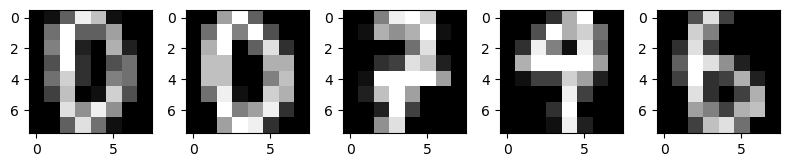

In [3]:
idx = [0,1,2,3,4]
# Plotting the samples
plt.figure(figsize=(8, 8))
for i in range(5):  
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[idx[i]], cmap='gray', interpolation='none')
#     plt.title(f'Class: {targets[idx[i]]}')
# plt.suptitle('Random image samples of each digit class from MNIST Digits dataset', fontsize=18)
plt.tight_layout()
plt.show()
# Visualize some samples from the dataset to confirm data integrity and understand the data's format.

# CNN Model Definition and Compilation

##### This code defines and compiles a convolutional neural network (CNN) with layers for feature extraction and classification, optimized for digit recognition from 8x8 images.

In [4]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

def create_cnn_model():
    model = Sequential([
        Input(shape=(8, 8, 1)),  # Use Input layer for specifying input shape
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    return model

model = create_cnn_model()
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a sequential CNN model architecture with convolutional, pooling, and dense layers. Additionally, set up K-Fold cross-validation for training.

##### Encoding the target labels into a one-hot format and trains the CNN model on the training data, while also validating it against the test set to monitor performance across epochs.

In [5]:
# Assuming y_train and y_test are initially integer labels for classes
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Fit model with one-hot encoded targets
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4601 - loss: 2.0160 - val_accuracy: 0.8982 - val_loss: 0.3817
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9271 - loss: 0.2820 - val_accuracy: 0.9395 - val_loss: 0.2053
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9606 - loss: 0.1508 - val_accuracy: 0.9601 - val_loss: 0.1502
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9695 - loss: 0.1188 - val_accuracy: 0.9680 - val_loss: 0.1183
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9790 - loss: 0.0850 - val_accuracy: 0.9673 - val_loss: 0.1086
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9794 - loss: 0.0761 - val_accuracy: 0.9744 - val_loss: 0.0953
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.9850 - loss: 0.0603 - val_accuracy: 0.9772 - val_loss: 0.0853
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9807 - loss: 0.0616 - va

In [6]:
X_train = X_train.reshape((-1, 8, 8, 1))
X_test = X_test.reshape((-1, 8, 8, 1))


# Implementing K-Fold Cross-Validation in CNN Training
##### In this section of the code, we implement a rigorous approach to validating our convolutional neural network (CNN) model using K-fold cross-validation. This method is particularly effective in ensuring that our model's performance is not only good on a single test/train split but generalizes well across various subsets of the data.

#### Key Aspects of the Implementation:
#### Data Preparation: Before proceeding with cross-validation, we ensure that both X_train and X_test are reshaped correctly to fit the model's input requirements. Also, y_train and y_test are converted from categorical labels into a one-hot encoded format to match the output layer of the CNN.
#### K-Fold Setup: We utilize the KFold class from sklearn.model_selection to set up a 5-fold cross-validation. This splits the training data into 5 subsets, where each subset gets a turn at being the validation set.
#### Model Training and Validation: For each fold, a new instance of the CNN model is created and compiled. The model is then trained on the training subset and validated on the validation subset. This process is repeated for each fold, ensuring that each subset of the data is used for validation exactly once.
#### Evaluation: After training, the model's performance on the validation set is assessed using the loss and accuracy metrics, which provide insights into how well the model is likely to perform on unseen data.

In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
# Convert y_train and y_test to numpy arrays if they are pandas Series or DataFrames

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Ensure X_train and X_test are numpy arrays with the correct shape
X_train = X_train.reshape((-1, 8, 8, 1))
X_test = X_test.reshape((-1, 8, 8, 1))

# Convert to numpy arrays explicitly if still in DataFrame or Series format
if isinstance(y_train_encoded, pd.DataFrame) or isinstance(y_train_encoded, pd.Series):
    y_train_encoded = y_train_encoded.values
if isinstance(y_test_encoded, pd.DataFrame) or isinstance(y_test_encoded, pd.Series):
    y_test_encoded = y_test_encoded.values

# Proceed with k-fold cross-validation
n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_count = 1

for train_index, val_index in kfold.split(X_train):
    train_X, val_X = X_train[train_index], X_train[val_index]
    train_y, val_y = y_train_encoded[train_index], y_train_encoded[val_index]

    model_kfold = create_cnn_model()
    model_kfold.compile(optimizer=Adam(learning_rate=0.0005),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

    print(f'Training Fold {fold_count}')
    model_kfold.fit(train_X, train_y, epochs=30, batch_size=40, verbose=0)

    val_loss, val_acc = model_kfold.evaluate(val_X, val_y, verbose=0)
    print(f'Validation results - Loss: {val_loss}, Accuracy: {val_acc}')
    
    fold_count += 1

# Define a sequential CNN model architecture with convolutional, pooling, and dense layers. Additionally, set up K-Fold cross-validation for training.

Training Fold 1
Validation results - Loss: 0.07176577299833298, Accuracy: 0.9810201525688171
Training Fold 2
Validation results - Loss: 0.07265524566173553, Accuracy: 0.9810201525688171
Training Fold 3
Validation results - Loss: 0.027115317061543465, Accuracy: 0.9928825497627258
Training Fold 4
Validation results - Loss: 0.029878173023462296, Accuracy: 0.9893238544464111
Training Fold 5
Validation results - Loss: 0.033021606504917145, Accuracy: 0.9893238544464111


##### This code evaluates a trained model on validation data by calculating key performance metrics: accuracy, precision, recall, and F1 score, helping to assess its effectiveness in classifying handwritten digits.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Assuming `val_X` and `val_y` are your validation datasets

# Make predictions
predictions = model_kfold.predict(val_X)
predicted_classes = np.argmax(predictions, axis=1)  # Convert softmax outputs to class predictions
true_classes = np.argmax(val_y, axis=1)  # Assuming val_y is one-hot encoded

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')  # Use 'micro' or 'weighted' based on needs
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
Accuracy: 0.9893238434163701
Precision: 0.9898802554598152
Recall: 0.9892815549045728
F1 Score: 0.989510243459686


##### This script visualizes the training and validation loss and accuracy over epochs, providing insights into the model's learning process and highlighting any trends in overfitting or underfitting.

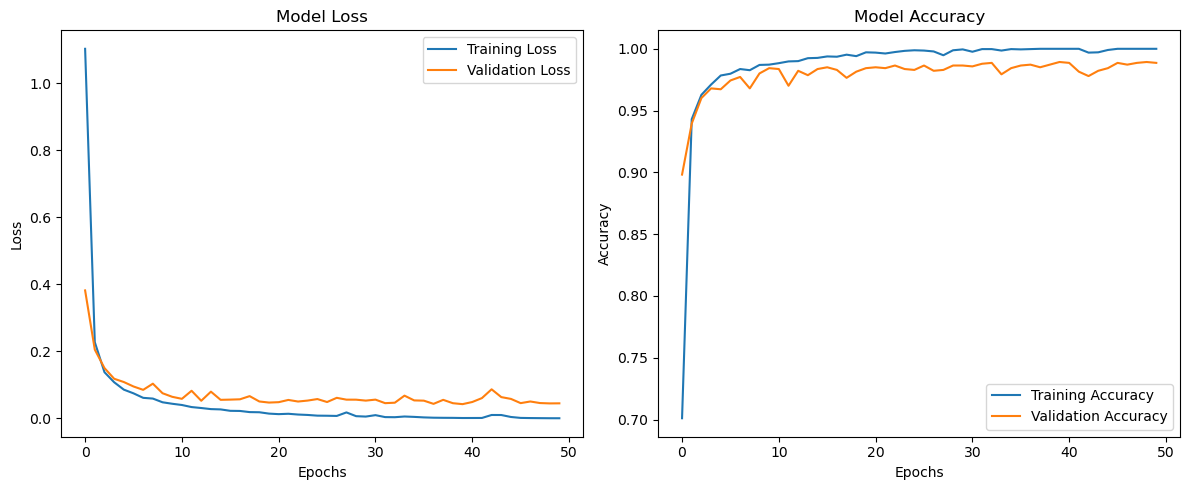

In [12]:
import matplotlib.pyplot as plt

# Assuming `history` is the return value from model.fit()

# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training and validation metrics to assess the model's performance. This helps in visualizing overfitting and underfitting trends.

# CNN Model Training and Evaluation with K-Fold Cross-Validation
##### Model Training: This code defines and trains a convolutional neural network using 5-fold cross-validation to ensure robustness by evaluating model performance across different subsets of the training data.
##### Confusion Matrix Visualization: After training, confusion matrices are plotted for each fold to visually assess the model's classification accuracy across different classes, highlighting potential areas for improvement.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


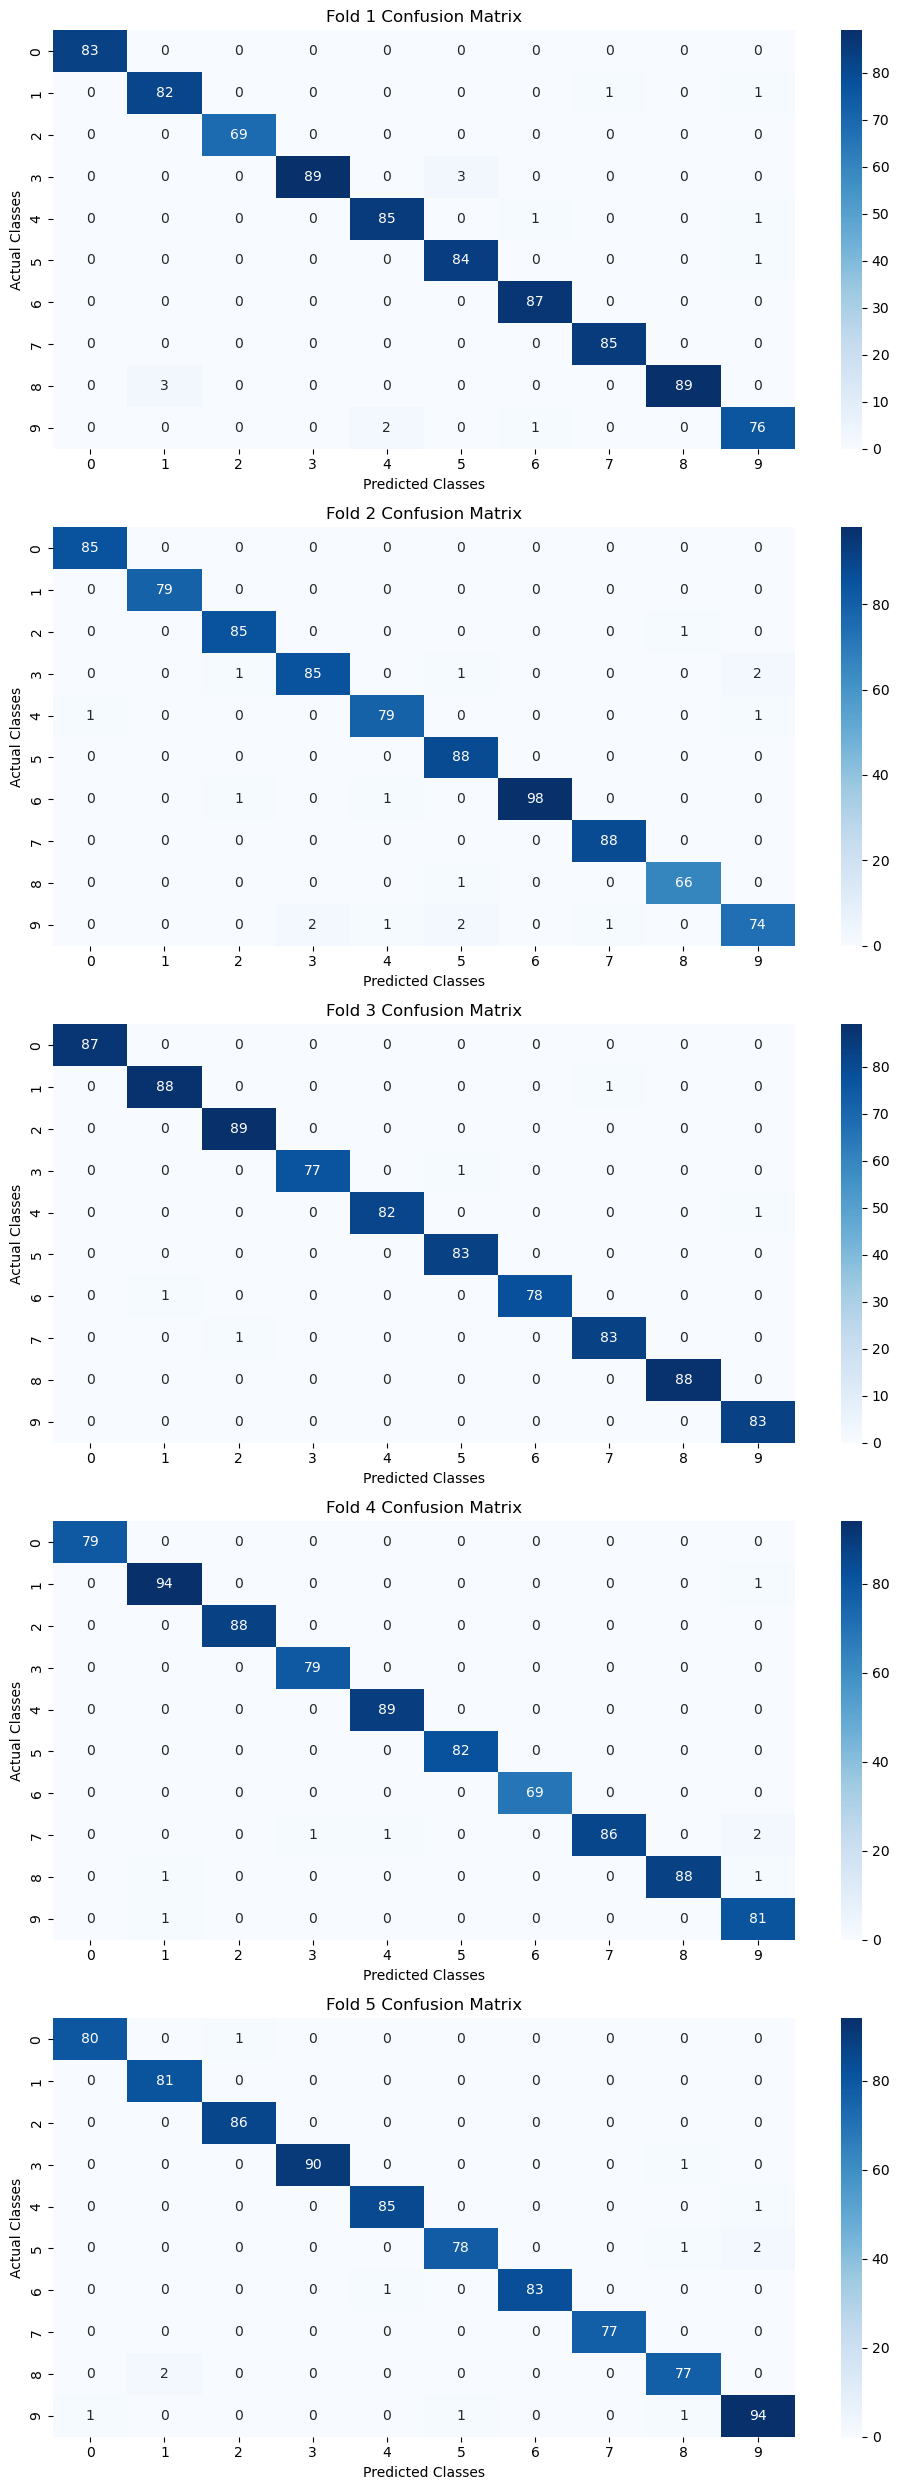

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

def create_cnn_model():
    model = Sequential([
        Input(shape=(8, 8, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1

# Prepare figure for plotting
fig, axes = plt.subplots(n_folds, 1, figsize=(10, 5 * n_folds))

for train_index, val_index in kfold.split(X_train):
    train_X, val_X = X_train[train_index], X_train[val_index]
    train_y, val_y = y_train_encoded[train_index], y_train_encoded[val_index]

    model_kfold = create_cnn_model()
    model_kfold.compile(optimizer=Adam(learning_rate=0.0005),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    model_kfold.fit(train_X, train_y, epochs=30, batch_size=40, verbose=0)

    # Predictions and Confusion Matrix
    predictions = model_kfold.predict(val_X)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(val_y, axis=1)
    cm = confusion_matrix(true_classes, predicted_classes)

    # Plotting
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold_no - 1])
    axes[fold_no - 1].set_title(f'Fold {fold_no} Confusion Matrix')
    axes[fold_no - 1].set_xlabel('Predicted Classes')
    axes[fold_no - 1].set_ylabel('Actual Classes')

    fold_no += 1

plt.tight_layout()
plt.show()

# Define a sequential CNN model architecture with convolutional, pooling, and dense layers. Additionally, set up K-Fold cross-validation for training.

#### Performance Tracking: It gathers key metrics such as accuracy and loss for both training and validation phases for each fold, providing comprehensive insight into the model’s behavior and effectiveness.

In [14]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

def create_cnn_model():
    model = Sequential([
        Input(shape=(8, 8, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
fold_accuracies = []
fold_val_accuracies = []
fold_losses = []
fold_val_losses = []

for train_index, val_index in kfold.split(X_train):
    train_X, val_X = X_train[train_index], X_train[val_index]
    train_y, val_y = y_train_encoded[train_index], y_train_encoded[val_index]

    model_kfold = create_cnn_model()
    model_kfold.compile(optimizer=Adam(learning_rate=0.0005),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    history = model_kfold.fit(train_X, train_y, epochs=30, batch_size=40, verbose=0, validation_data=(val_X, val_y))

    # Collecting metrics
    fold_accuracies.append(history.history['accuracy'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    fold_losses.append(history.history['loss'])
    fold_val_losses.append(history.history['val_loss'])

    fold_no += 1

# Define a sequential CNN model architecture with convolutional, pooling, and dense layers. Additionally, set up K-Fold cross-validation for training.

# Visualizing Training and Validation Metrics
##### Accuracy and Loss Plots: This code visualizes the training and validation accuracy and loss for each fold of the cross-validation process, offering a clear view of model performance dynamics over training epochs.
##### Assessment of Model Fit: Through these plots, it's possible to identify trends in overfitting or underfitting, guiding potential adjustments in model training or architecture.

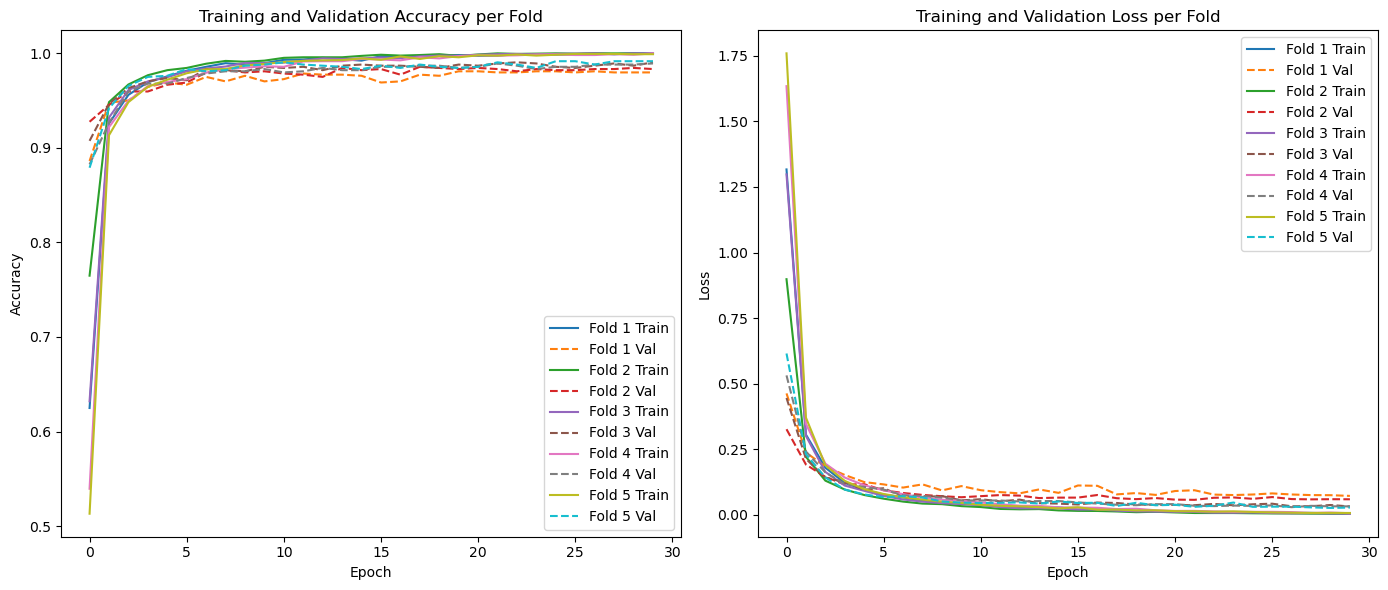

In [15]:
import matplotlib.pyplot as plt

# Plotting cross-validation metrics
plt.figure(figsize=(14, 6))

# Plot for training and validation accuracy
plt.subplot(1, 2, 1)
for i in range(n_folds):
    plt.plot(fold_accuracies[i], label=f'Fold {i+1} Train')
    plt.plot(fold_val_accuracies[i], label=f'Fold {i+1} Val', linestyle='--')
plt.title('Training and Validation Accuracy per Fold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for training and validation loss
plt.subplot(1, 2, 2)
for i in range(n_folds):
    plt.plot(fold_losses[i], label=f'Fold {i+1} Train')
    plt.plot(fold_val_losses[i], label=f'Fold {i+1} Val', linestyle='--')
plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training and validation metrics to assess the model's performance. This helps in visualizing overfitting and underfitting trends.